In [18]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv('Breast-Cancer.csv')
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
df.drop(columns=['id','Unnamed: 32'],inplace=True)

In [10]:
df.shape

(569, 31)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Splitting the Data

In [19]:
X = df.drop(columns=['diagnosis'])
Y = df['diagnosis']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
X_train.shape, X_test.shape

((455, 30), (114, 30))

Scaling the Data

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Applying KNN Algorithm

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
y_pred = knn.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred)

0.9385964912280702

Cross Validation for Optimal value for K

In [38]:
scores = []

for i in range(1,15):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred))

  print(f'For {i} Accuracy Score is: {scores[i-1]}')

For 1 Accuracy Score is: 0.9385964912280702
For 2 Accuracy Score is: 0.9473684210526315
For 3 Accuracy Score is: 0.9473684210526315
For 4 Accuracy Score is: 0.956140350877193
For 5 Accuracy Score is: 0.9473684210526315
For 6 Accuracy Score is: 0.956140350877193
For 7 Accuracy Score is: 0.9473684210526315
For 8 Accuracy Score is: 0.956140350877193
For 9 Accuracy Score is: 0.9649122807017544
For 10 Accuracy Score is: 0.956140350877193
For 11 Accuracy Score is: 0.956140350877193
For 12 Accuracy Score is: 0.956140350877193
For 13 Accuracy Score is: 0.956140350877193
For 14 Accuracy Score is: 0.956140350877193


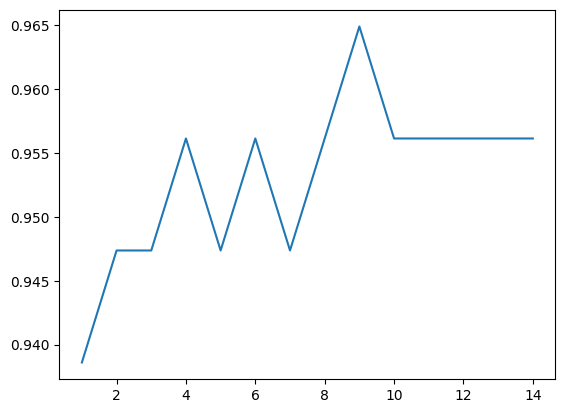

In [40]:
import matplotlib.pyplot as plt

plt.plot(range(1,15),scores)